# Exercício 1 - PMR3508
## Classificador KNN para a base *adult*

### Parte 1: Explorando os dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [172]:
train_data = pd.read_csv('train_data.csv', 
                         index_col='Id', 
                         na_values='?', 
                         engine='python', 
                         sep=r'\s*,\s*')

In [173]:
train_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
Id,,,,,,,,,,,,,,,
16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [174]:
train_data.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
Id,,,,,,,,,,,,,,,
48835,42,Private,384236,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,>50K
48836,23,Private,129042,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0,40,United-States,<=50K
48837,30,Private,195488,HS-grad,9,Never-married,Priv-house-serv,Own-child,White,Female,0,0,40,Guatemala,<=50K
48838,18,Private,27620,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,<=50K
48839,47,Local-gov,203067,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,<=50K


In [175]:
train_data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Conferindo campos numéricos e não-numéricos:

In [176]:
train_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

Conferindo número de linhas e colunas:

In [177]:
train_data.shape

(32560, 15)

Conferindo em quais colunas há campos nulos:

In [178]:
train_data.isnull().any()

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool

Algumas das colunas possuem linhas com dados faltantes. Elas serão eliminadas! 

In [179]:
train_data = train_data.dropna()

In [180]:
train_data.shape

(30161, 15)

Poucas linhas foram perdidas: 2399, o que corresponde a 6,7% de toda a base. Consideramos que a perda é irrelevante.

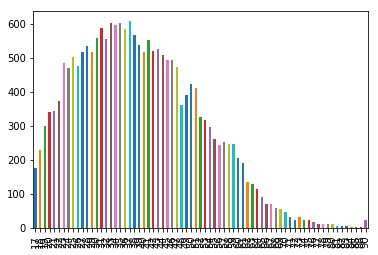

In [181]:
plt.figure()
x = train_data.loc[train_data['sex']=='Male']
x["age"].value_counts().sort_index().plot(kind="bar")

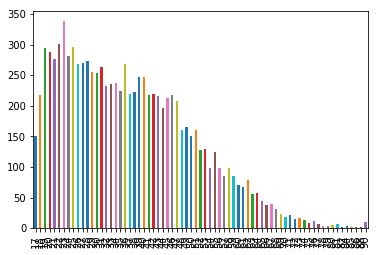

In [182]:
x = train_data.loc[train_data['sex']=='Female']
x["age"].value_counts().sort_index().plot(kind="bar")

![Age Distribuition, 2000](http://www.censusscope.org/us/chart_age_graph_1.gif)

Como ilustrado acima, a distribuição de idade da base é semelhante à distribuição da população americana no ano de 2000.

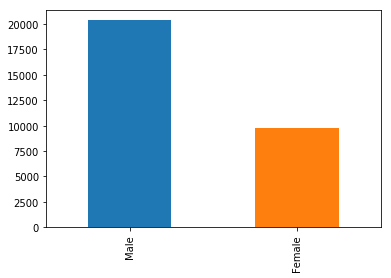

In [184]:
train_data["sex"].value_counts().plot(kind="bar")

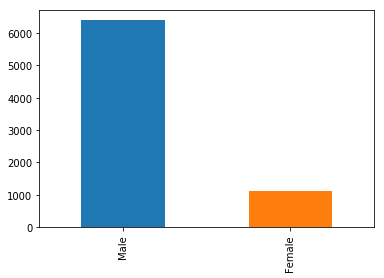

In [185]:
y = train_data.loc[train_data["income"]=='>50K']
y["sex"].value_counts().plot(kind="bar")

O sexo masculino é predominante dentre aqueles que possuem *income* >50K.

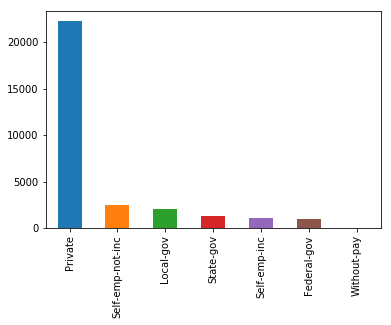

In [186]:
train_data["workclass"].value_counts().plot(kind="bar")

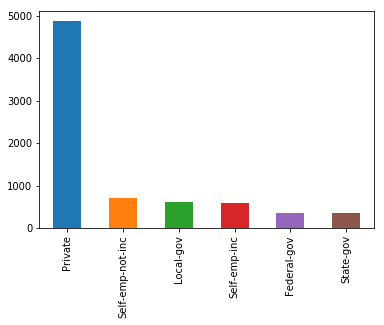

In [187]:
y = train_data.loc[train_data["income"]=='>50K']
y["workclass"].value_counts().plot(kind="bar")

Os empregados no setor privado são maioria dentre os que possuem *income* >50K, no entanto a distribuição é praticamente identica à da população total.

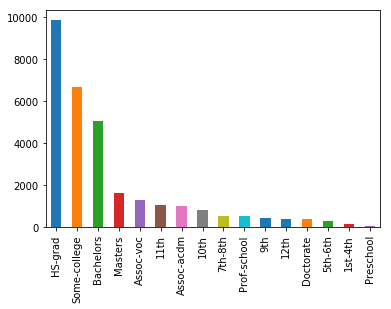

In [188]:
train_data["education"].value_counts().plot(kind="bar")

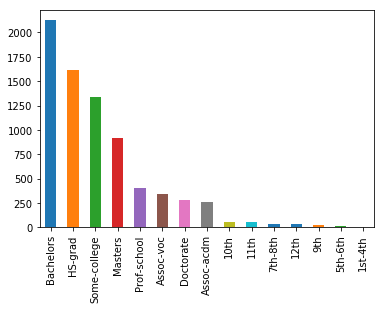

In [189]:
y = train_data.loc[train_data["income"]=='>50K']
y["education"].value_counts().plot(kind="bar")

A grande maioria dentre os que ganham mais que 50K possuem nivel de educação dentre as quatro primeiras classes do gráfico acima.

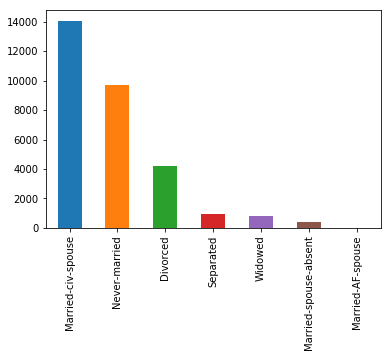

In [190]:
train_data["marital.status"].value_counts().plot(kind="bar")

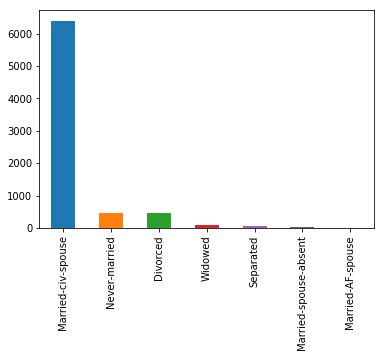

In [191]:
y = train_data.loc[train_data["income"]=='>50K']
y["marital.status"].value_counts().plot(kind="bar")

Dentre os que ganham mais que 50K, a grande maioria é casado no estado civil.

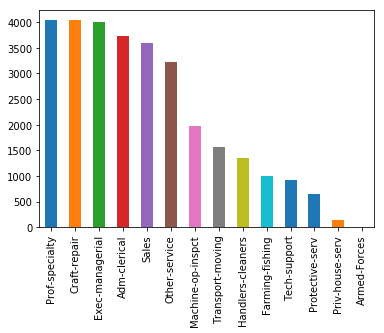

In [192]:
train_data["occupation"].value_counts().plot(kind="bar")

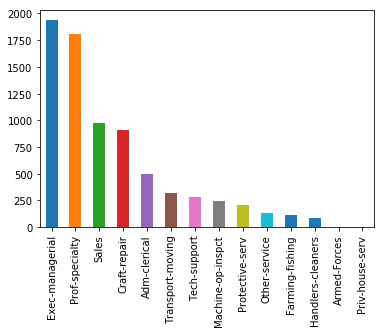

In [193]:
y = train_data.loc[train_data["income"]=='>50K']
y["occupation"].value_counts().plot(kind="bar")

A grande maioria dentre os que ganham mais que 50K possuem nivel de educação dentre as cinco primeiras classes do gráfico acima.

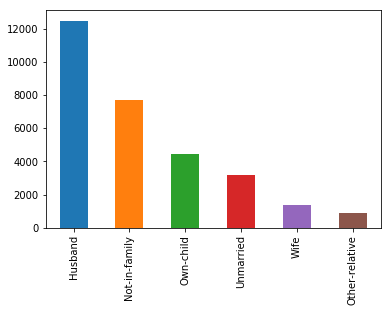

In [194]:
train_data["relationship"].value_counts().plot(kind="bar")

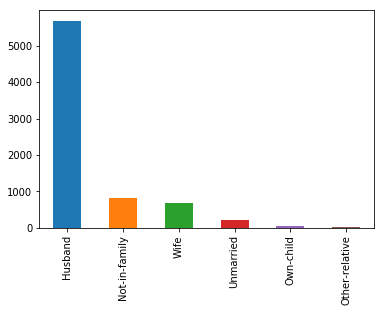

In [195]:
y = train_data.loc[train_data["income"]=='>50K']
y["relationship"].value_counts().plot(kind="bar")

A grande maioria dos que ganham mais que 50K apresentam "relationship" = "Husband".

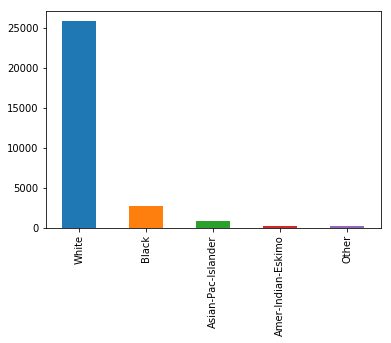

In [196]:
train_data["race"].value_counts().plot(kind="bar")

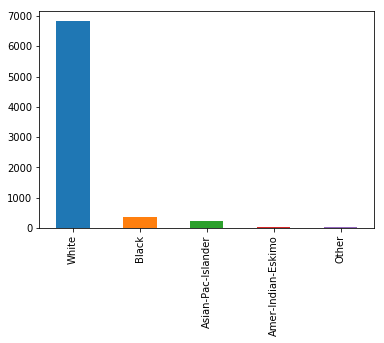

In [197]:
y = train_data.loc[train_data["income"]=='>50K']
y["race"].value_counts().plot(kind="bar")

A grande maioria dentre os que ganham mais que 50K são brancos.

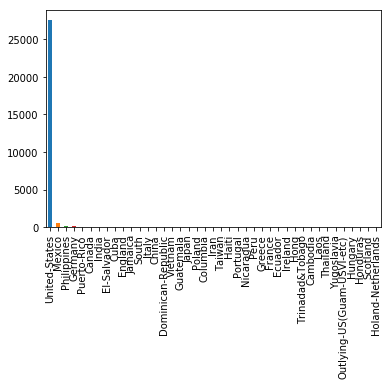

In [198]:
train_data["native.country"].value_counts().plot(kind="bar")

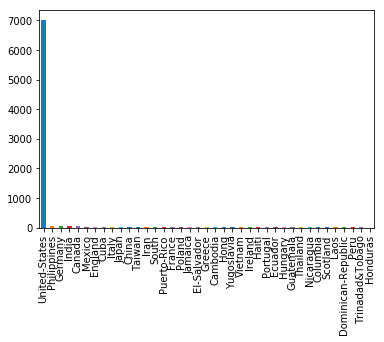

In [199]:
y = train_data.loc[train_data["income"]=='>50K']
y["native.country"].value_counts().plot(kind="bar")

### Parte 2: *Feature Engineering*

Inicialmente vou utilizar como *features* todas as colunas, com exceção da coluna **fnlwgt** e da coluna **native.country**, já que a grande maioria da base é composta por norte americanos. Para codificar as colunas não numéricas, utilizarei o método *get_dummies* do pandas. Após a codificação das colunas não-numéricas, as colunas mais relevantes serão selecionadas de acordo com as diferenças entre as ditribuições da população total e da população que ganha mais que 50K, tal como destacado na **Parte 1**.

In [200]:
test_data = pd.read_csv('test_data.csv', 
                         index_col='Id', 
                         na_values='?', 
                         engine='python', 
                         sep=r'\s*,\s*')

In [201]:
from sklearn import preprocessing

In [202]:
test_data = test_data.dropna()

In [203]:
test_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
Id,,,,,,,,,,,,,,
0,25,Private,120596,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,44,United-States
1,64,State-gov,152537,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
2,31,Private,100135,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
3,45,Private,189123,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States
4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States


In [271]:
Xtrain_data = train_data[["age","education","education.num","marital.status","occupation","relationship","capital.gain","capital.loss","hours.per.week","race","sex","workclass"]]
Ytrain_data = train_data.income
Xtest_data = test_data[["age","education","education.num","marital.status","occupation","relationship","capital.gain","capital.loss","hours.per.week","race","sex","workclass"]]

Aplicando o *get dummies*:

In [272]:
Xtrain_data = pd.get_dummies(Xtrain_data)
Xtest_data = pd.get_dummies(Xtest_data)

In [273]:
Xtrain_data.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,...,race_White,sex_Female,sex_Male,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
Id,,,,,,,,,,,,,,,,,,,,,
16280,34,10,0,0,44,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
16281,58,6,0,0,40,1,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
16282,25,10,0,0,42,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
16283,24,10,0,0,40,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
16284,57,9,5178,0,60,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0


In [274]:
Xtrain_data.columns.tolist()

['age',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'education_10th',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'marital.status_Divorced',
 'marital.status_Married-AF-spouse',
 'marital.status_Married-civ-spouse',
 'marital.status_Married-spouse-absent',
 'marital.status_Never-married',
 'marital.status_Separated',
 'marital.status_Widowed',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-ser

Aplicando-se o *get dummies*, acabamos com muitos *features*; alguns deles não tão relevantes para conclusão da variável de classe ('occupation_Armed-Forces', por exemplo, considerando que uma parcela desprezível da base possui essa ocupação). A ideia é simplificar as colunas selecionando as de maior peso, de modo a evitar *overfitting*. Selecionando as colunas mais relevantes:

In [281]:
Xtrain_data = Xtrain_data[[   'age',
                             'education.num',
                              'capital.gain',
                             'capital.loss',
                             'hours.per.week',
                             'education_Bachelors',
                             'education_HS-grad',
                             'education_Masters',
                             'education_Prof-school',
                             'education_Some-college',
                             'marital.status_Married-civ-spouse',
                             'occupation_Craft-repair',
                             'occupation_Exec-managerial',
                             'occupation_Prof-specialty',
                             'occupation_Sales',
                             'relationship_Husband',
                             'relationship_Not-in-family',
                             'race_White',
                             'sex_Male']]
Xtest_data = Xtest_data[[  'age',
                             'education.num',
                             'capital.gain',
                             'capital.loss',
                             'hours.per.week',
                             'education_Bachelors',
                             'education_HS-grad',
                             'education_Masters',
                             'education_Prof-school',
                             'education_Some-college',
                             'marital.status_Married-civ-spouse',
                             'occupation_Craft-repair',
                             'occupation_Exec-managerial',
                             'occupation_Prof-specialty',
                             'occupation_Sales',
                             'relationship_Husband',
                             'relationship_Not-in-family',
                             'race_White',
                             'sex_Male']]

### Parte 3: Model Fitting

In [282]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [283]:
knn = KNeighborsClassifier(n_neighbors=3)

In [284]:
scores = cross_val_score(knn, Xtrain_data, Ytrain_data, cv=10)

In [285]:
scores

array([0.82863772, 0.83460391, 0.833941  , 0.83388594, 0.83355438,
       0.83985411, 0.8418435 , 0.83355438, 0.83217247, 0.83814262])

*Score* médio para K = 3:

In [286]:
scores.mean()

0.8350190030656318

Fazendo agora para multiplos valores de K:

In [287]:
scores_array = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, Xtrain_data, Ytrain_data, cv=10)
    scores_array.append(scores.mean())

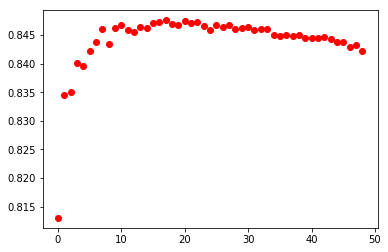

In [288]:
plt.plot(scores_array, 'ro')

Escolhendo o K com maior *score*:

In [289]:
scores_array.index(max(scores_array))

17

In [290]:
scores_array[17]

0.8475846462483096

Escolhendo k = 17:

In [291]:
knn17 = KNeighborsClassifier(n_neighbors=17)
scores17 = cross_val_score(knn, Xtrain_data, Ytrain_data, cv=10)

In [292]:
scores17

array([0.8435532 , 0.83791846, 0.84951939, 0.83554377, 0.84383289,
       0.84151194, 0.8428382 , 0.84118037, 0.84278607, 0.84411277])

In [293]:
scores17.mean()

0.8422797051653987

In [294]:
knn17.fit(Xtrain_data,Ytrain_data)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [295]:
Ytest_data = knn17.predict(Xtest_data)

In [296]:
submission = pd.DataFrame(Ytest_data)

In [297]:
submission.to_csv("submission.csv")